In [1]:
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
EXP_ID = "apch"
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
stats_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_stats.csv")
stats_df.head()

,project,precision,recall,f1,auc,gmean,ap,specifi
0,activemq,0.441268,2.753906e-01,0.083984,0.064453,2.753906e-01,0.037109,4.316406e-01
1,camel,0.001718,1.191505e-07,0.000267,0.034816,4.234167e-07,0.118417,1.347601e-13
2,cassandra,0.927279,4.074345e-01,0.311794,0.189348,8.694878e-01,0.985435,7.945864e-01
3,flink,0.038457,6.628649e-01,0.942872,0.144384,3.964651e-01,0.719987,2.784377e-02
4,groovy,0.113987,1.238766e-01,0.116544,0.521673,3.682766e-01,0.647655,2.422372e-02


In [4]:
# prepare data for heatmap of p-values
annot_p_values = np.array(stats_df.iloc[:, 1:])
p_values = np.where(annot_p_values < ALPHA, 1, 0)
p_values = pd.DataFrame(p_values, columns=stats_df.columns[1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=stats_df.columns[1:])
p_values["project"] = stats_df["project"]
annot_p_values["project"] = stats_df["project"]
p_values = p_values.set_index("project")
annot_p_values = annot_p_values.set_index("project")

p_values = p_values.astype(int)
print(p_values.head())

annot_p_values = annot_p_values.round(3)
print(annot_p_values.head())

           precision  recall  f1  auc  gmean  ap  specifi
project                                                  
activemq           0       0   0    0      0   1        0
camel              1       1   1    1      1   0        1
cassandra          0       0   0    0      0   0        0
flink              1       0   0    0      0   0        1
groovy             0       0   0    0      0   0        1
           precision  recall     f1    auc  gmean     ap  specifi
project                                                          
activemq       0.441   0.275  0.084  0.064  0.275  0.037    0.432
camel          0.002   0.000  0.000  0.035  0.000  0.118    0.000
cassandra      0.927   0.407  0.312  0.189  0.869  0.985    0.795
flink          0.038   0.663  0.943  0.144  0.396  0.720    0.028
groovy         0.114   0.124  0.117  0.522  0.368  0.648    0.024


In [5]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  precision &  recall &     f1 &    auc &  gmean &     ap &  specifi \\
project   &            &         &        &        &        &        &          \\
\midrule
activemq  &      0.441 &   0.275 &  0.084 &  0.064 &  0.275 &  0.037 &    0.432 \\
camel     &      0.002 &   0.000 &  0.000 &  0.035 &  0.000 &  0.118 &    0.000 \\
cassandra &      0.927 &   0.407 &  0.312 &  0.189 &  0.869 &  0.985 &    0.795 \\
flink     &      0.038 &   0.663 &  0.943 &  0.144 &  0.396 &  0.720 &    0.028 \\
groovy    &      0.114 &   0.124 &  0.117 &  0.522 &  0.368 &  0.648 &    0.024 \\
hbase     &      0.000 &   0.000 &  0.300 &  0.445 &  0.003 &  0.092 &    0.000 \\
hive      &      0.000 &   0.000 &  0.583 &  0.119 &  0.002 &  0.194 &    0.001 \\
ignite    &      0.000 &   0.000 &  0.042 &  0.009 &  0.000 &  0.900 &    0.000 \\
\bottomrule
\end{tabular}



<AxesSubplot: ylabel='project'>

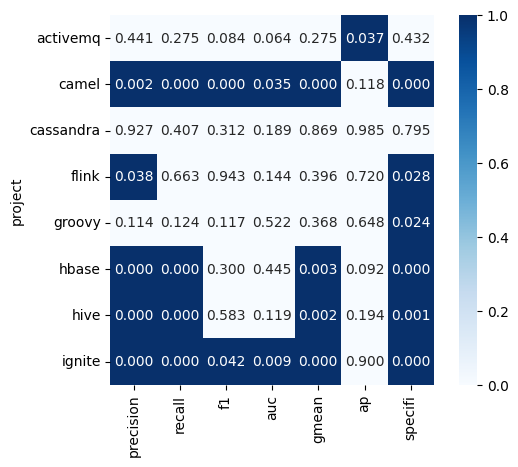

In [6]:
sns.heatmap(p_values, annot=annot_p_values, cmap="Blues", fmt=".3f", vmin=0, vmax=1, square=True)

In [7]:
cliff_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_cliff.csv")
cliff_df = cliff_df[["project", "precision", "recall", "auc", "gmean"]]
cliff_df.head()

,project,precision,recall,auc,gmean
0,activemq,negligible,small,negligible,small
1,camel,negligible,small,negligible,small
2,cassandra,negligible,negligible,negligible,negligible
3,flink,negligible,negligible,negligible,negligible
4,groovy,small,small,negligible,negligible


In [8]:
# prepare data for heatmap of p-values
annot_p_values = np.array(cliff_df.iloc[:, 1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=cliff_df.columns[1:])
annot_p_values["project"] = cliff_df["project"]
annot_p_values = annot_p_values.set_index("project")

print(annot_p_values.head())

            precision      recall         auc       gmean
project                                                  
activemq   negligible       small  negligible       small
camel      negligible       small  negligible       small
cassandra  negligible  negligible  negligible  negligible
flink      negligible  negligible  negligible  negligible
groovy          small       small  negligible  negligible


In [9]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{lllll}
\toprule
{} &   precision &      recall &         auc &       gmean \\
project   &             &             &             &             \\
\midrule
activemq  &  negligible &       small &  negligible &       small \\
camel     &  negligible &       small &  negligible &       small \\
cassandra &  negligible &  negligible &  negligible &  negligible \\
flink     &  negligible &  negligible &  negligible &  negligible \\
groovy    &       small &       small &  negligible &  negligible \\
hbase     &       small &      medium &  negligible &       small \\
hive      &       small &       large &  negligible &       large \\
ignite    &      medium &      medium &  negligible &       small \\
\bottomrule
\end{tabular}



In [10]:
stats_df = stats_df[["project", "precision", "recall", "auc", "gmean"]]
# prepare data for heatmap of p-values
annot_p_values = np.array(stats_df.iloc[:, 1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=stats_df.columns[1:])
annot_p_values["project"] = stats_df["project"]
annot_p_values = annot_p_values.set_index("project")

annot_p_values = annot_p_values.round(3)
print(annot_p_values.head())

           precision  recall    auc  gmean
project                                   
activemq       0.441   0.275  0.064  0.275
camel          0.002   0.000  0.035  0.000
cassandra      0.927   0.407  0.189  0.869
flink          0.038   0.663  0.144  0.396
groovy         0.114   0.124  0.522  0.368


In [11]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  precision &  recall &    auc &  gmean \\
project   &            &         &        &        \\
\midrule
activemq  &      0.441 &   0.275 &  0.064 &  0.275 \\
camel     &      0.002 &   0.000 &  0.035 &  0.000 \\
cassandra &      0.927 &   0.407 &  0.189 &  0.869 \\
flink     &      0.038 &   0.663 &  0.144 &  0.396 \\
groovy    &      0.114 &   0.124 &  0.522 &  0.368 \\
hbase     &      0.000 &   0.000 &  0.445 &  0.003 \\
hive      &      0.000 &   0.000 &  0.119 &  0.002 \\
ignite    &      0.000 &   0.000 &  0.009 &  0.000 \\
\bottomrule
\end{tabular}

